# NIFTY50 Single stocks analysis
**Notebook contains analysis and forecast on a single stock.**


Importing necessary packages

In [1]:
!pip install livelossplot

In [2]:
from os import listdir
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from livelossplot import PlotLossesKeras
sns.set_theme()
import warnings
warnings.filterwarnings('ignore')
%autosave 30

Autosaving every 30 seconds


In [3]:
#dft = pd.read_csv(r'C:\Users\asuto\Desktop\Work\Datasets\NIFTY50\NIFTYMASTERDATA.csv',index_col='Date',parse_dates=True)

url = 'https://raw.githubusercontent.com/AsutoshDalei/stock-work/main/NIFTYMASTERDATA.csv'
dft = pd.read_csv(url,parse_dates=True)
dft['Date'] = pd.to_datetime(dft['Date'])
dft.set_index('Date',inplace = True)
dft

comps = dft.Symbol.unique()

In [4]:
dft

,Symbol,Prev Close,Open,High,Low,Close,Last,Volume,Turnover
Date,,,,,,,,,
2010-11-04,ADANIPORTS,159.90,161.0,163.00,160.30,161.20,161.05,835546,1.348395e+13
2010-11-05,ADANIPORTS,161.20,163.0,163.00,161.60,162.30,162.35,187158,3.037435e+12
2010-11-08,ADANIPORTS,162.30,162.5,163.45,160.20,161.40,161.30,613082,9.911300e+12
2010-11-09,ADANIPORTS,161.40,162.5,165.00,161.35,162.25,162.40,601933,9.825511e+12
2010-11-10,ADANIPORTS,162.25,162.5,162.90,159.55,159.90,160.00,423032,6.795621e+12
...,...,...,...,...,...,...,...,...,...
2021-04-26,ZEEL,188.00,190.6,191.10,185.10,186.40,186.70,8542755,1.600451e+14
2021-04-27,ZEEL,186.40,188.0,192.95,186.80,188.15,188.80,14247767,2.698636e+14
2021-04-28,ZEEL,188.15,188.8,190.60,187.10,189.10,188.95,8429439,1.591917e+14


## Below are the companies the model will be monitoring

In [5]:
comps

array(['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV',
       'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA',
       'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH',
       'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR',
       'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL',
       'KOTAKBANK', 'LT', 'MARUTI', 'MM', 'NESTLEIND', 'NTPC', 'ONGC',
       'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA',
       'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UPL', 'VEDL', 'WIPRO', 'ZEEL'], dtype=object)

In [6]:
comp30 = ['INFY','TCS','RELIANCE','ICICIBANK','HDFC','HCLTECH','BHARTIARTL',
          'INDUSINDBK','SBIN','LT','TECHM','MM','AXISBANK','ITC','BAJAJ-AUTO','ONGC',
          'TATASTEEL','NTPC','TECHM','ASIANPAINT','POWERGRID','BAJAJFINSV','TITAN','NESTLEIND',
          'ULTRACEMCO','MARUTI','HDFCBANK','HINDUNILVR','SUNPHARMA','KOTAKBANK'  
         ]
len(comp30)

30

In [7]:
#comp30

## Various columns and the dataframe itself

In [8]:
cols = ['Symbol','Prev Close', 'Open', 'High', 'Low','Close' ,'Last','Volume', 'Turnover']
dft

,Symbol,Prev Close,Open,High,Low,Close,Last,Volume,Turnover
Date,,,,,,,,,
2010-11-04,ADANIPORTS,159.90,161.0,163.00,160.30,161.20,161.05,835546,1.348395e+13
2010-11-05,ADANIPORTS,161.20,163.0,163.00,161.60,162.30,162.35,187158,3.037435e+12
2010-11-08,ADANIPORTS,162.30,162.5,163.45,160.20,161.40,161.30,613082,9.911300e+12
2010-11-09,ADANIPORTS,161.40,162.5,165.00,161.35,162.25,162.40,601933,9.825511e+12
2010-11-10,ADANIPORTS,162.25,162.5,162.90,159.55,159.90,160.00,423032,6.795621e+12
...,...,...,...,...,...,...,...,...,...
2021-04-26,ZEEL,188.00,190.6,191.10,185.10,186.40,186.70,8542755,1.600451e+14
2021-04-27,ZEEL,186.40,188.0,192.95,186.80,188.15,188.80,14247767,2.698636e+14
2021-04-28,ZEEL,188.15,188.8,190.60,187.10,189.10,188.95,8429439,1.591917e+14


## Get Data Function

In [9]:
def get_data(stock,feature):
    return dft[dft.Symbol == stock][feature]

## Generate Data Function
**This function returns a dataframe containing the following features of a stock:**
- Opening Price
- Day wise difference
- Consecutive day opening price difference
- MACD Histogram value for the day
- RSI value for the day

These features are returned as a dataframe, which will later be used for time series forecasting.

In [10]:
def generate_data(stock,feature,slow=26,fast=12,smooth=9,lookback=14):
    op = get_data(stock,'Open') # Open
    cl = get_data(stock,'Close') # Close
    vol = get_data(stock,'Volume') # Volume
    #diff = cl-op # Daily Difference
    ewa1 = op.ewm(span=slow,min_periods=0,adjust=False).mean()
    datf = ewa1.diff() # Consecutive Day Difference
    ewa2 = op.ewm(span=fast,min_periods=0,adjust=False).mean()
    macd = ewa2-ewa1
    signal = macd.ewm(span=smooth,min_periods=0,adjust=False).mean().values
    hist = macd - signal # MACD Difference
    
    #datf = op.diff()
    up = []
    down = []
    for i in range(len(datf)):
        if datf[i] < 0:
            up.append(0)
            down.append(datf[i])
        else:
            up.append(datf[i])
            down.append(0)
            
    up_series = pd.Series(up)
    down_series = pd.Series(down).abs()
    up_ewm = up_series.ewm(com = lookback - 1, adjust = False).mean()
    down_ewm = down_series.ewm(com = lookback - 1, adjust = False).mean()
    rs = up_ewm/down_ewm
    rsi = 100 - (100 / (1 + rs)) # RSI
    
    final = {'open':op.values,'close':cl.values,'volume':vol,'cdiff':datf.values,
             'macdhist':hist.values,'rsi':rsi.values
            }
    
    df = pd.DataFrame(final)
    df.set_index(op.index,inplace=True)
    df.interpolate(limit_direction ='backward',methoh = 'linear',inplace=True)
    
    return df
    

In [11]:
%%time
df = generate_data('MARUTI','Open')
df

CPU times: user 73.3 ms, sys: 771 µs, total: 74.1 ms
Wall time: 80.1 ms


,open,close,volume,cdiff,macdhist,rsi
Date,,,,,,
2010-11-04,1501.00,1507.60,352793,1.777778,0.000000,100.000000
2010-11-05,1525.00,1512.35,40103,1.777778,1.531624,100.000000
2010-11-08,1515.00,1488.60,228488,0.905350,1.769658,100.000000
2010-11-09,1490.00,1471.95,382790,-1.013565,0.223119,95.652653
2010-11-10,1475.00,1475.10,209770,-2.049597,-1.723215,87.380120
...,...,...,...,...,...,...
2021-04-26,6690.20,6638.90,937344,-11.953606,0.907720,1.374358
2021-04-27,6669.95,6568.75,1610651,-12.568154,7.469229,1.309428
2021-04-28,6568.75,6573.80,1406270,-19.133476,6.024766,1.215296


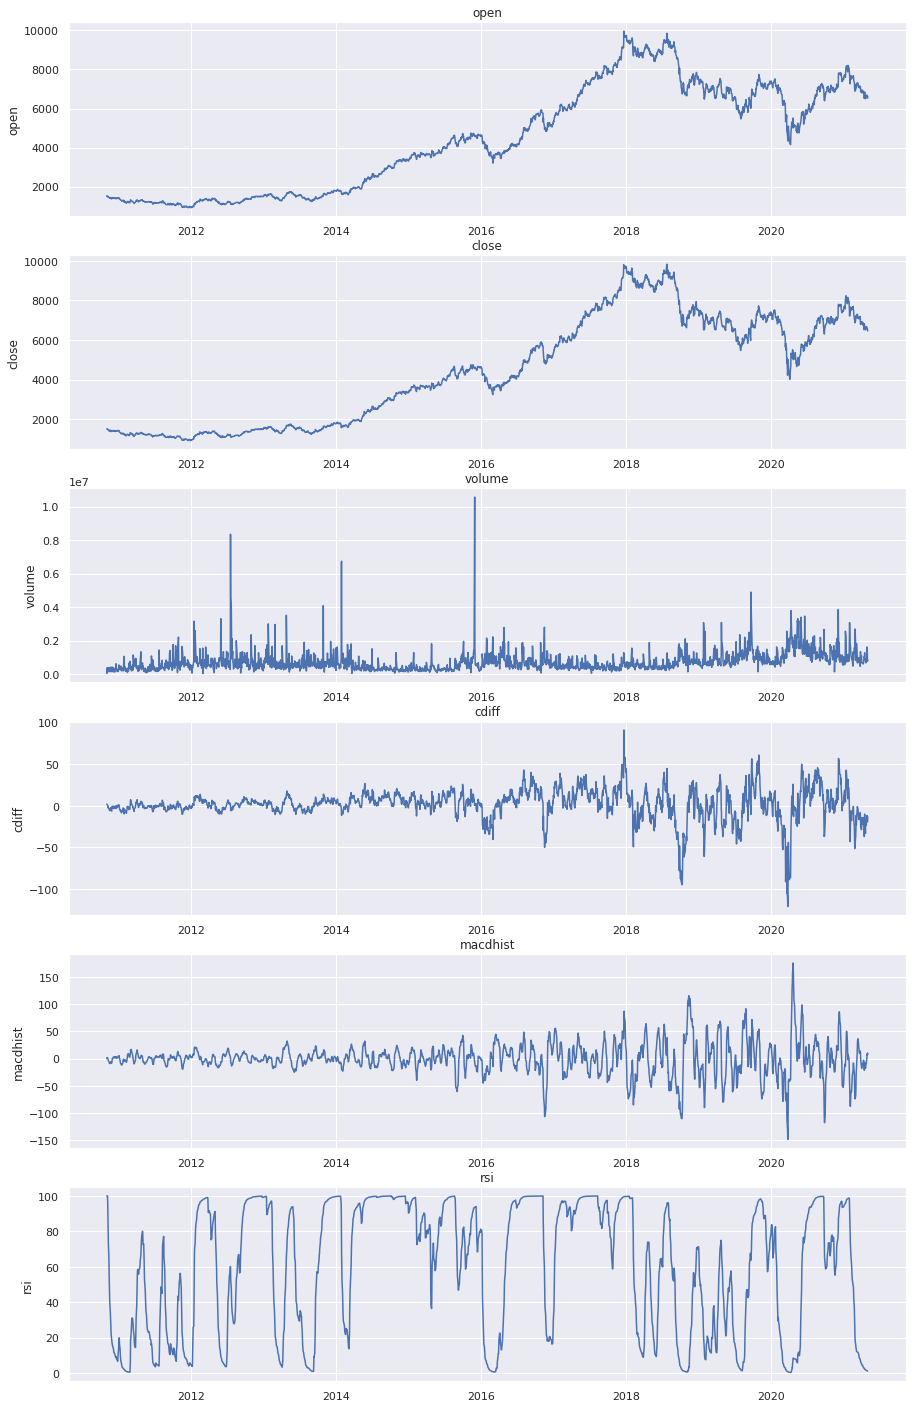

In [12]:
def plot_data(data):
    n = len(data.columns)
    plt.figure(figsize=(15,25))
    for i in range(n):
        plt.subplot(n,1,i+1)
        sns.lineplot(data = data,x = data.index, y = data.columns[i])
        plt.title(data.columns[i])
        plt.xlabel('')
        
plot_data(df)

In [13]:
df.shape

(2598, 6)

**For our task, the input data will be:** 
- Stock Opening Price
- Consecutive Day Difference
- MACD Histogram
- RSI

**While the target will be:**
- Daily Difference


In [14]:
ipfea = ['open','cdiff','macdhist','rsi','volume']
opfea = ['close']

**Since all our features are of a different scale, it is important for us to scale our data, for our model to run faster and not develop bias towards a higher scale feature** 

In [15]:
%%time
scaip = StandardScaler()
scaop = StandardScaler()
df[ipfea] = scaip.fit_transform(df[ipfea])
df[opfea] = scaop.fit_transform(df[opfea])
#df_sca = pd.DataFrame(sca.fit_transform(df),columns=df.columns)

CPU times: user 10.2 ms, sys: 22 µs, total: 10.2 ms
Wall time: 9.98 ms


In [16]:
def chunk(data,window=7):
    iparr,oparr = [],[]
    for i in tqdm(range(data.shape[0]-window)):
        iparr.append(data[ipfea].iloc[i:i+window])
        oparr.append(data[opfea].iloc[i+window])
    iparr,oparr = np.array(iparr),np.array(oparr)
    print(iparr.shape,oparr.shape)
    return iparr,oparr    
       

**We will keep data from start till 31/12/2020 for training and the data from 1/1/2021 for test**

In [17]:
%%time
date = '2021-01-01'
ips,ops = chunk(df.loc[:date])
ipt,opt = chunk(df.loc[date:])

100%|██████████| 2512/2512 [00:02<00:00, 922.30it/s] 


(2512, 7, 5) (2512, 1)


100%|██████████| 73/73 [00:00<00:00, 944.96it/s]

(73, 7, 5) (73, 1)
CPU times: user 2.77 s, sys: 208 ms, total: 2.98 s
Wall time: 2.87 s


In [18]:
%%time
ipx,opx = shuffle(ips,ops,random_state=32)

CPU times: user 1.07 ms, sys: 7 µs, total: 1.08 ms
Wall time: 1.08 ms


In [19]:
df.head()

,open,close,volume,cdiff,macdhist,rsi
Date,,,,,,
2010-11-04,-1.090828,-1.089120,-0.609118,-0.014041,0.007080,1.069493
2010-11-05,-1.081909,-1.087351,-1.135564,-0.014041,0.058923,1.069493
2010-11-08,-1.085625,-1.096196,-0.818398,-0.062401,0.066981,1.069493
2010-11-09,-1.094915,-1.102397,-0.558615,-0.168768,0.014632,0.950447
2010-11-10,-1.100489,-1.101224,-0.849912,-0.226197,-0.051248,0.723916


## LSTM Model

In [20]:
import tensorflow as tf


In [21]:
act = 'relu'
drp = 0.2
model = tf.keras.models.Sequential([
                           tf.keras.layers.GRU(units=8,activation=act,return_sequences=True,
                                                input_shape=(ipx.shape[1],ipx.shape[2])),
                           tf.keras.layers.GRU(units=16,activation=act,return_sequences=True),
                           tf.keras.layers.Dropout(drp),
                           tf.keras.layers.GRU(units=64,activation=act,return_sequences=True),
                           tf.keras.layers.Dropout(drp),
    
                           #tf.keras.layers.GRU(units=128,activation=act,return_sequences=True),
                           #tf.keras.layers.Dropout(drp),
                           #tf.keras.layers.GRU(units=128,activation=act,return_sequences=True),
                           #tf.keras.layers.Dropout(drp),
    
                           tf.keras.layers.GRU(units=64,activation=act,return_sequences=True),
                           tf.keras.layers.Dropout(drp),
                           tf.keras.layers.GRU(units=16,activation=act,return_sequences=True),
                           tf.keras.layers.Dropout(drp),
                           tf.keras.layers.GRU(units=8,activation='tanh',return_sequences=True),
                           tf.keras.layers.Dropout(drp),
                           tf.keras.layers.GRU(units=4,activation=act),
                           tf.keras.layers.Dense(units=1)
                          ])

2022-05-15 18:17:06.082091: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


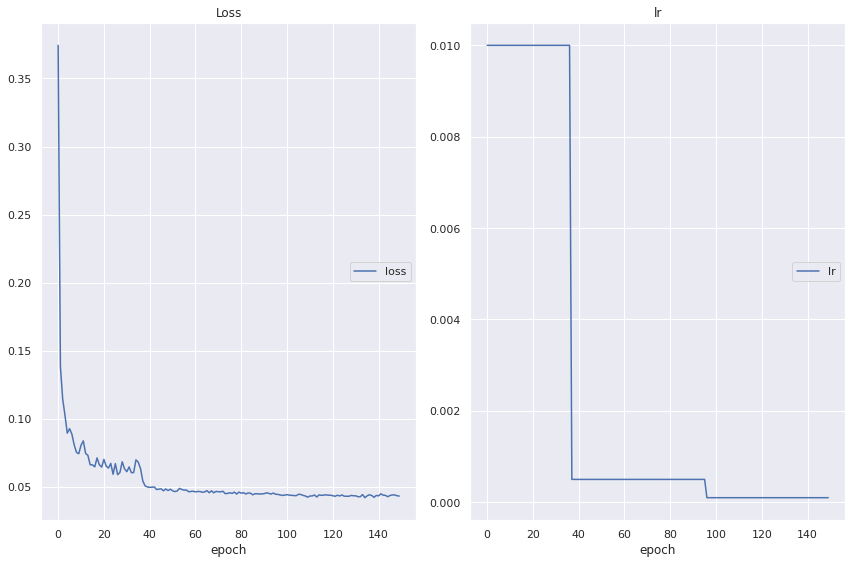

Loss
	loss             	 (min:    0.042, max:    0.374, cur:    0.043)
lr
	lr               	 (min:    0.000, max:    0.010, cur:    0.000)


In [22]:
tf.keras.backend.clear_session()

opti = tf.optimizers.Adam(learning_rate=0.01)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',min_lr=0.0001,factor = 0.05)
early_stp = tf.keras.callbacks.EarlyStopping('loss',patience=25,)


model.compile(optimizer=opti,loss='mean_absolute_error')
history=model.fit(ipx,opx,epochs=150,batch_size=64,verbose=0,callbacks=[reduce_lr,PlotLossesKeras(),early_stp])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 7, 8)              360       
_________________________________________________________________
gru_1 (GRU)                  (None, 7, 16)             1248      
_________________________________________________________________
dropout (Dropout)            (None, 7, 16)             0         
_________________________________________________________________
gru_2 (GRU)                  (None, 7, 64)             15744     
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 64)             0         
_________________________________________________________________
gru_3 (GRU)                  (None, 7, 64)             24960     
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 64)             0

In [24]:
opp = model.predict(ipt)

In [25]:
lossfn = tf.keras.losses.MeanSquaredError()
lossfn(opt,opp).numpy()

0.018059872

0.018059872


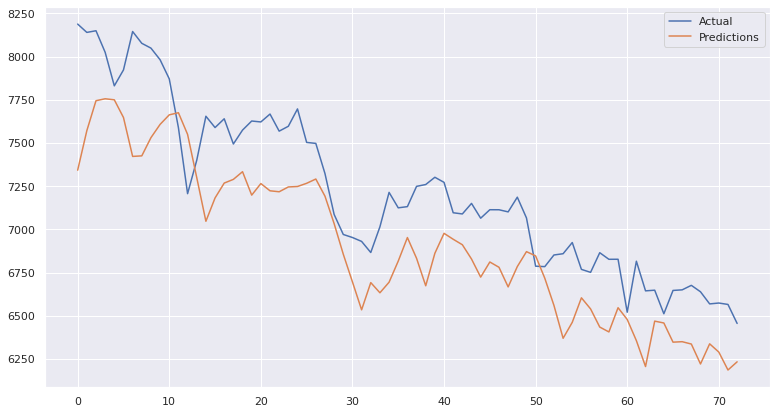

In [26]:
def plot_res(model=model,ipx=ipt,opx=opt,scaled = True):
    opp = model.predict(ipx)
    lossfn = tf.keras.losses.MeanSquaredError()
    print(lossfn(opx,model.predict(ipx)).numpy())
    
    plt.figure(figsize=(13,7))
    if scaled:
        plt.plot(opx,label = 'Actual')
        plt.plot(opp, label = 'Predictions')
    else:
        opt1 = scaop.inverse_transform(opx)
        opp1 = scaop.inverse_transform(opp)
        plt.plot(opt1,label = 'Actual')
        plt.plot(opp1, label = 'Predictions')
        
        
    plt.legend()
    return

plot_res(ipx=ipt,opx=opt,scaled = False)

## Transfer Learning Attempt

In [27]:
def flow_fn(stock,model=model,feature = 'Open',scaled = False):
    dfl = generate_data(stock,'Open')
    
    
    scaipl = StandardScaler()
    scaopl = StandardScaler()
    dfl[ipfea] = scaipl.fit_transform(dfl[ipfea])
    dfl[opfea] = scaopl.fit_transform(dfl[opfea])
    #return dfl
    ipl,opl = chunk(dfl)
    
    plot_res(model = model,ipx = ipl,opx = opl,scaled = scaled)

SUNPHARMA


100%|██████████| 2591/2591 [00:02<00:00, 974.90it/s]


(2591, 7, 5) (2591, 1)
0.16337277
CPU times: user 5.48 s, sys: 1.64 s, total: 7.12 s
Wall time: 5.16 s


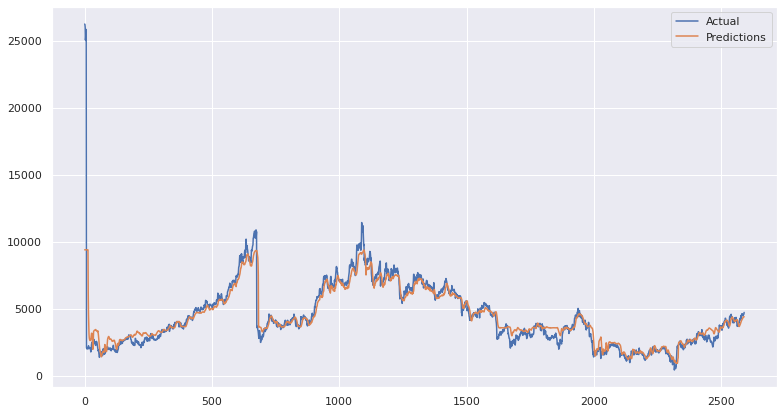

In [28]:
%%time
stk = comp30[9]
stk = np.random.choice(comp30)
print(stk)
flow_fn(stock = stk)

**As we see, the model's predictions on different stocks are not greatly bad. There is scope of improvement which can be implement towards building a generalized model.**

## Optuna Hyper Parameter tuning